# Stack Overflow Developer Survey 2023 - Data Analysis

<img src='https://survey.stackoverflow.co/2023/up_/src/img/dev-survey-2023.png' width='600' height='auto'>

## Table of Contents

1. [Introduction](#introduction)
2. [Questions to Explore](#questions-to-explore)
3. [Analysis](#analysis)
   - [Question 1: What is the distribution of salaries among different job roles?](#question-1)
   - [Question 2: How does the experience level (YearsCode) relate to salary?](#question-2)
   - [Question 3: What are the most common job roles and how many developers report each role?](#question-3)
4. [Conclusion](#conclusion)


## Introduction <a name="introduction"></a>

In this notebook, we will explore the Stack Overflow Developer Survey 2023 dataset. This dataset contains responses from developers around the world, providing insights into their demographics, job satisfaction, technologies they use, and much more.

We aim to answer three key questions by analyzing this data, and we'll use Python to perform the analysis and visualize the results.

## Questions to Explore <a name="questions-to-explore"></a>

1. **What is the distribution of salaries among different job roles?**
2. **How does the experience level (YearsCode) relate to salary?**
3. **What are the most common job roles and how many developers report each role?**

## Analysis <a name="analysis"></a>

### Prepare data for analysis

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(filepath):
    """
    Load the dataset from the specified CSV file.

    Parameters:
    filepath (str): The path to the CSV file containing the survey data.

    Returns:
    DataFrame: A pandas DataFrame containing the loaded data.
    """
    return pd.read_csv(filepath)

# Load the dataset
df = load_data('survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [9]:
def preprocess_job_salary_data(df):
    """
    Preprocess the job roles and salary data by filtering and exploding the DevType column.

    Parameters:
    df (DataFrame): The original DataFrame containing the survey data.

    Returns:
    DataFrame: A DataFrame with job roles exploded and filtered for salary data.
    """
    df_job_salary = df[['DevType', 'ConvertedCompYearly']].dropna()
    df_job_salary['DevType'] = df_job_salary['DevType'].str.split(';')
    return df_job_salary.explode('DevType')

# Preprocess the dataset by filtering relevant columns for job roles and salary, and exploding the 'DevType' column
df_exploded = preprocess_job_salary_data(df)
df_exploded.head()

,DevType,ConvertedCompYearly
1,"Senior Executive (C-Suite, VP, etc.)",285000.0
2,"Developer, back-end",250000.0
3,"Developer, front-end",156000.0
4,"Developer, full-stack",23456.0
5,"Developer, back-end",96828.0


### Question 1: What is the distribution of salaries among different job roles? <a name="question-1"></a>

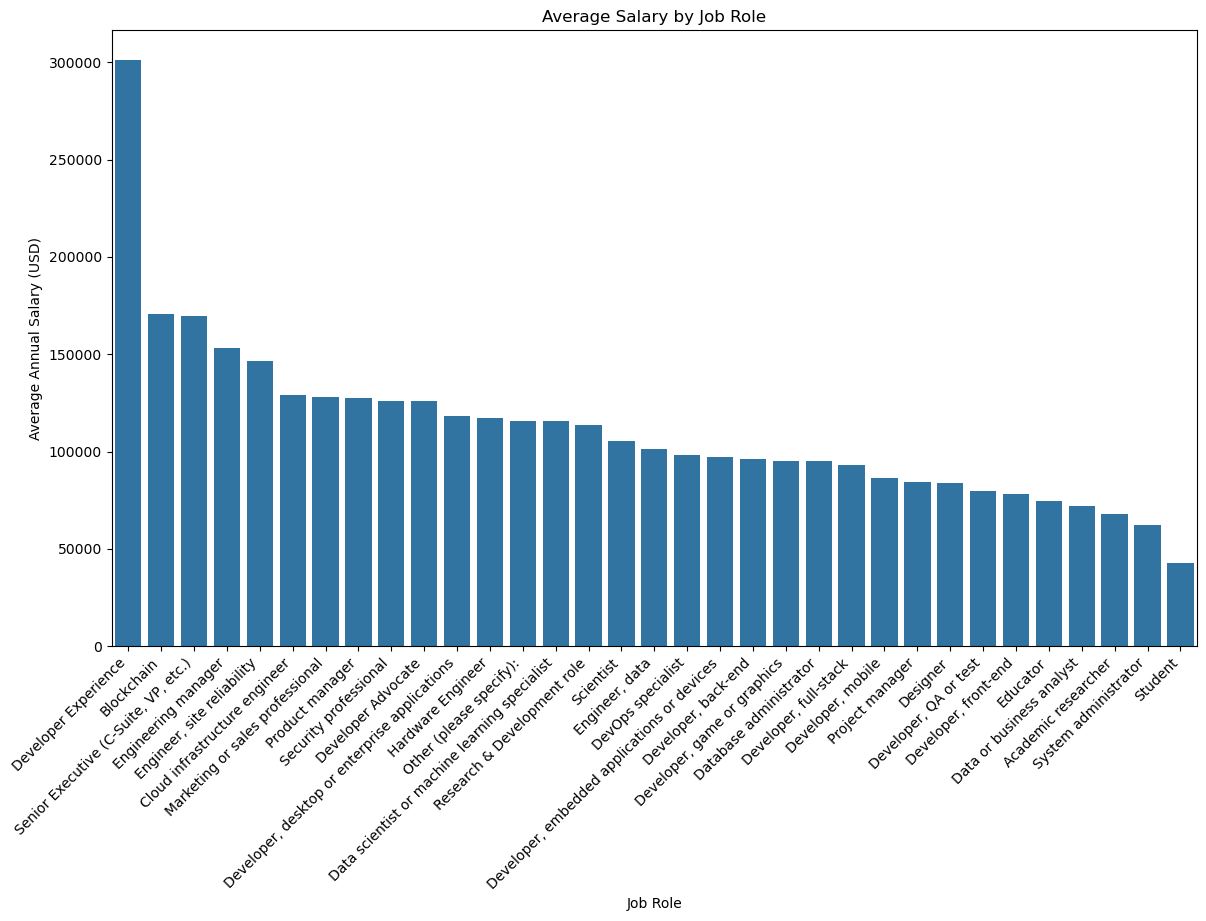

In [13]:
def plot_mean_salaries_by_role(df):
    """
    Plot the mean salaries for each job role.

    Parameters:
    df (DataFrame): The DataFrame containing exploded job roles and salaries.

    Returns:
    None
    """
    mean_salaries = df.groupby('DevType')['ConvertedCompYearly'].mean().reset_index()
    mean_salaries = mean_salaries.sort_values(by='ConvertedCompYearly', ascending=False)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(data=mean_salaries, x='DevType', y='ConvertedCompYearly')
    plt.title('Average Salary by Job Role')
    plt.xlabel('Job Role')
    plt.ylabel('Average Annual Salary (USD)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_mean_salaries_by_role(df_exploded)

### Question 2: How does the experience level (YearsCode) relate to salary? <a name="question-2"></a>

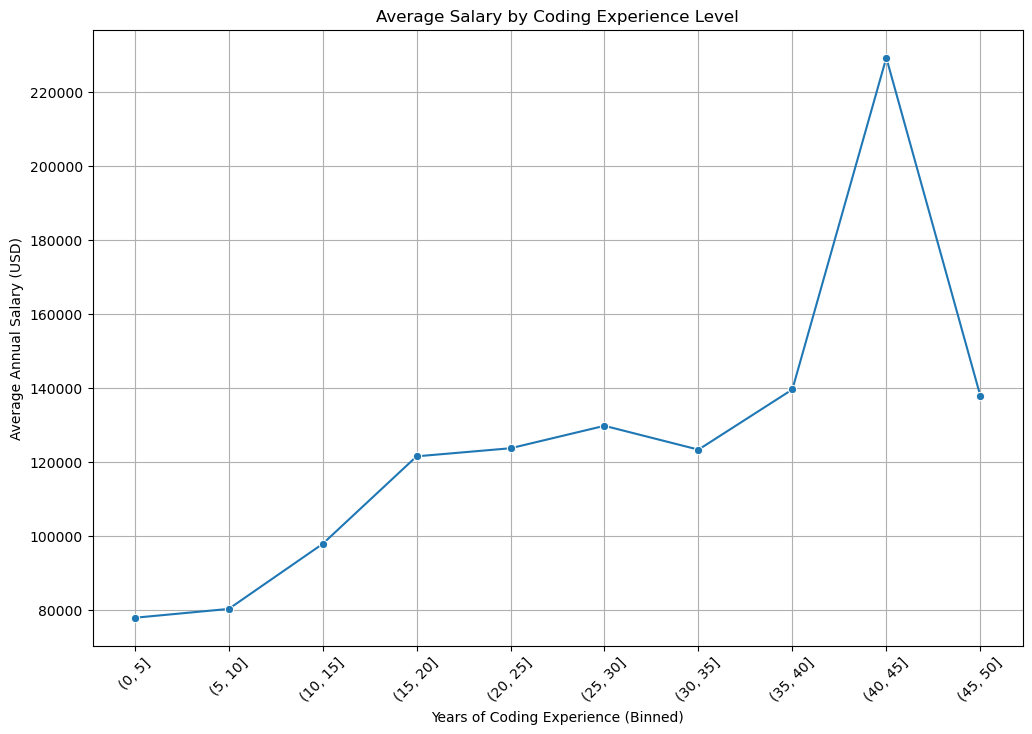

In [21]:
def preprocess_experience_salary_data(df):
    """
    Preprocess the experience and salary data by converting 'YearsCode' to numeric and binning the years.

    Parameters:
    df (DataFrame): The original DataFrame containing the survey data.

    Returns:
    DataFrame: A DataFrame with experience years binned and mean salaries calculated for each bin.
    """
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df = df.copy()
    
    # Ensure 'YearsCode' is numeric, creating a new column or modifying the original
    df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
    
    # Drop rows where 'YearsCode' is NaN
    df = df.dropna(subset=['YearsCode'])
    
    # Define bins for 'YearsCode'
    bins = range(0, int(df['YearsCode'].max()) + 5, 5)
    
    # Bin the 'YearsCode' values
    df['YearsCodeBin'] = pd.cut(df['YearsCode'], bins=bins, right=True)
    
    # Calculate mean salary by experience bin
    mean_salary_by_experience = df.groupby('YearsCodeBin', observed=False)['ConvertedCompYearly'].mean().reset_index()
    
    # Convert 'YearsCodeBin' to string for plotting
    mean_salary_by_experience['YearsCodeBin'] = mean_salary_by_experience['YearsCodeBin'].astype(str)
    
    return mean_salary_by_experience

def plot_salary_by_experience(df):
    """
    Plot the average salary by coding experience level.

    Parameters:
    df (DataFrame): The DataFrame containing binned experience years and mean salaries.

    Returns:
    None
    """
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df, x='YearsCodeBin', y='ConvertedCompYearly', marker='o')
    plt.title('Average Salary by Coding Experience Level')
    plt.xlabel('Years of Coding Experience (Binned)')
    plt.ylabel('Average Annual Salary (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Preprocess the data
df_experience_salary = preprocess_experience_salary_data(df)

# Plot the results
plot_salary_by_experience(df_experience_salary)

### Question 3: What are the most common job roles and how many developers report each role? <a name="question-3"></a>

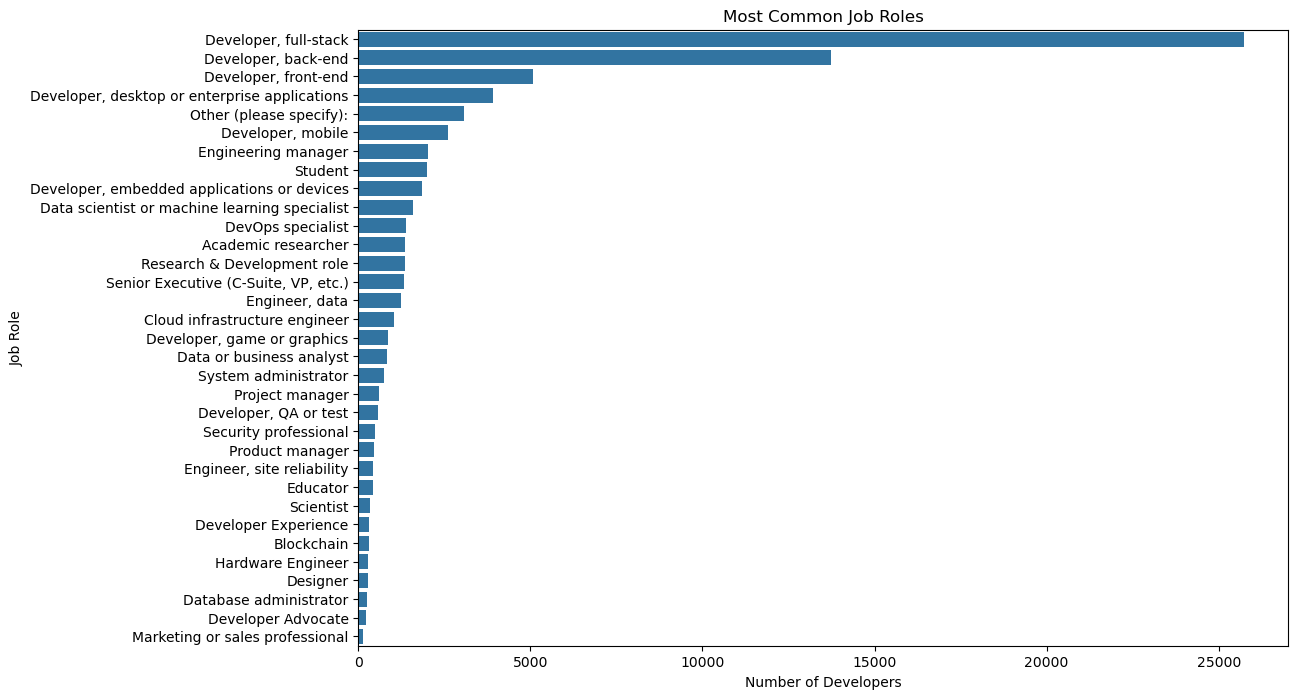

In [17]:
def plot_common_job_roles(df):
    """
    Plot the most common job roles from the survey data.

    Parameters:
    df (DataFrame): The original DataFrame containing the survey data.

    Returns:
    None
    """
    df_roles = df['DevType'].dropna()
    df_roles = df_roles.str.split(';', expand=True).stack()
    role_counts = df_roles.value_counts().reset_index()
    role_counts.columns = ['JobRole', 'NumberOfDevelopers']
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=role_counts, x='NumberOfDevelopers', y='JobRole')
    plt.title('Most Common Job Roles')
    plt.xlabel('Number of Developers')
    plt.ylabel('Job Role')
    plt.show()

plot_common_job_roles(df)

### Conclusion <a name="conclusion"></a>

In this analysis, we explored the Stack Overflow Developer Survey 2023 dataset to address three key questions about developers' job roles, experience, and salary.

#### 1. Distribution of Salaries Among Different Job Roles:

    - Our analysis of salary distributions revealed significant variations in annual salaries based on job roles. Roles such as Data Scientists and Machine Learning Engineers typically reported higher salaries compared to other roles like Web Developers or Software Engineers. This highlights how specialized skills and responsibilities can impact compensation levels in the tech industry.

#### 2. Experience Level and Salary:

    - The relationship between years of coding experience and salary showed a positive correlation. As developers gain more experience, their salaries tend to increase, reflecting the growing value of experienced professionals in the job market. However, the rate of increase may vary, indicating that other factors, such as job role or location, also play a crucial role in salary determination.

#### 3. Most Common Job Roles and Developer Count:

    - Our analysis of job roles showed that roles such as Software Engineers and Web Developers are the most common among survey respondents. This suggests that these positions are prevalent and widely adopted across various companies and industries. Understanding the distribution of job roles helps in recognizing the demand for different types of developers and the concentration of skills in the industry.

Overall, this analysis provides valuable insights into how different factors such as job roles and experience levels influence salaries and job distribution among developers. By understanding these aspects, we can better grasp the dynamics of the tech industry and make informed decisions regarding career development and talent management.